# Predicting Age from National Health and Nutrition Health Survey 2013-2014

by Ismail (Husain) Bhinderwala, Rashid Mammadov, Sienko Ikhabi, Dongchun Chen

# Summary

In this project, we developed a logistic regression model to classify individuals into two age groups: senior (65 years and older) and non-senior (under 65 years), using data from the National Health and Nutrition Examination Survey (NHANES) 2013-2014. The model uses features such as physical and health-related measurements to make predictions. The logistic regression model achieved an overall accuracy of 0.75 and an F1 score of 0.77 on the test data. It correctly classified 422 cases, including 371 non-seniors and 51 seniors, but misclassified 148 cases. While these misclassifications have an impact on the overall accuracy of the model, they highlight areas where the algorithm can be improved. With further refinements and a deeper analysis of the misclassified cases, the model has strong potential for accurately classifying individuals into senior and non-senior age groups, enabling more tailored health assessments and resource allocation.

# Introduction

Age classification is an important aspect of demographic analysis and health resource planning, particularly when distinguishing between seniors (65 years and older) and non-seniors (under 65 years). Accurate age group identification allows for better-targeted healthcare strategies and more efficient resource allocation. Traditional methods often rely on broad assumptions, which can miss important individual differences. In this project, we investigate whether a machine learning model can classify individuals into these two age groups using physical and health-related measurements.

We used data from the National Health and Nutrition Examination Survey (NHANES) 2013-2014 (National Health and Nutrition Health Survey, 2019) to develop a logistic regression model for this purpose. Accurately identifying seniors is especially important, as they are more likely to require regular medical care and management of chronic conditions (Löckenhoff et al., 2016). By enhancing the precision of age classification, this model has the potential to improve healthcare planning and ensure that interventions are better aligned with the needs of different age groups. This study demonstrates how machine learning can be used to tackle real-world challenges in public health and demographic research.


# Methods and Results

## Data Preprocessing and EDA

The dataset used for this analysis is the National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset. It was obtained from the UCI Machine Learning Repository in ZIP format and extracted for preprocessing. The dataset contains 2,278 entries and 8 features after cleaning and transformations, with the target variable being age_group. Notably, the target variable exhibited an imbalance with two classes: Adult (84%) and Senior (16%) (National Health and Nutrition Health Survey, 2019).

The data preprocessing involved several steps. Unnecessary columns such as id and age were removed, focusing on features directly relevant to the prediction task. Categorical variables were converted into more interpretable forms: gender was mapped from numeric values (1 for Male, 2 for Female), weekly_physical_activity was mapped to "Yes" and "No," and diabetic was mapped to "Yes," "No," and "Borderline." Additionally, a single erroneous row with the value 7.0 in the weekly_physical_activity column was removed as it did not align with the dataset’s binary format. Descriptive statistics for numerical variables (bmi, blood_glucose_fasting, oral, insulin_level) were calculated to summarize their distributions. The preprocessing was implemented using Python libraries such as NumPy and Pandas (Harris et al., 2020; McKinney, 2010).

Exploratory data analysis (EDA) was performed to better understand the dataset. For numerical features, a correlation analysis was conducted, and the relationships between features were visualized using a heatmap created with Matplotlib (Barrett et al., 2005). The distribution of categorical features was examined, highlighting imbalances in age_group, gender, diabetic, and weekly_physical_activity. For instance, the diabetic column revealed that most entries were labeled as "No," with only 21 labeled "Yes" and 58 labeled "Borderline."

To address the class imbalance in the target variable, stratified sampling was employed during the train-test split. This ensured that the proportions of the age_group classes were preserved in both training (75%) and testing (25%) datasets. A random seed of 522 was used to make the results reproducible. The processed datasets were exported as CSV files to a structured directory for further analysis and modeling (Pedregosa et al., 2011).

In [1]:
# Data Preprocessing and EDA Imports
import numpy as np
import requests
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [2]:
# downloading data as zip and extracting
url = "https://archive.ics.uci.edu/static/public/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.zip"

request = requests.get(url)
with open("../data/raw/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.zip", 'wb') as f:
    f.write(request.content)

with zipfile.ZipFile("../data/raw/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.zip", 'r') as zip_ref:
    zip_ref.extractall("../data/raw")

In [3]:
# pre-processing data
col_names = [
    "id",
    "age_group",
    "age",
    "gender",
    "weekly_physical_activity",
    "bmi",
    "blood_glucose_fasting",
    "diabetic",
    "oral",
    "insulin_level"
]

data = pd.read_csv("../data/raw/NHANES_age_prediction.csv", names=col_names, skiprows=1).drop(columns=["id","age"])

data["gender"] = data["gender"].replace({
    1 : "Male",
    2 : "Female"
})

data["weekly_physical_activity"] = data["weekly_physical_activity"].replace({
    1 : "Yes",
    2 : "No"
})

data["diabetic"] = data["diabetic"].replace({
    1 : "Yes",
    2 : "No",
    3 : "Borderline"
})

data

,age_group,gender,weekly_physical_activity,bmi,blood_glucose_fasting,diabetic,oral,insulin_level
0,Adult,Female,No,35.7,110.0,No,150.0,14.91
1,Adult,Female,No,20.3,89.0,No,80.0,3.85
2,Adult,Male,No,23.2,89.0,No,68.0,6.14
3,Adult,Male,No,28.9,104.0,No,84.0,16.15
4,Adult,Female,Yes,35.9,103.0,No,81.0,10.92
...,...,...,...,...,...,...,...,...
2273,Adult,Female,No,33.5,100.0,No,73.0,6.53
2274,Adult,Male,No,30.0,93.0,No,208.0,13.02
2275,Adult,Male,No,23.7,103.0,No,124.0,21.41
2276,Adult,Female,No,27.4,90.0,No,108.0,4.99


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_group                 2278 non-null   object 
 1   gender                    2278 non-null   object 
 2   weekly_physical_activity  2278 non-null   object 
 3   bmi                       2278 non-null   float64
 4   blood_glucose_fasting     2278 non-null   float64
 5   diabetic                  2278 non-null   object 
 6   oral                      2278 non-null   float64
 7   insulin_level             2278 non-null   float64
dtypes: float64(4), object(4)
memory usage: 142.5+ KB


Table 1: Descriptive Statistics of Numerical Features

In [5]:
data.describe()

,bmi,blood_glucose_fasting,oral,insulin_level
count,2278.000000,2278.000000,2278.000000,2278.000000
mean,27.955180,99.553117,114.978929,11.834794
std,7.248962,17.889834,47.061239,9.718812
min,14.500000,63.000000,40.000000,0.140000
25%,22.800000,91.000000,87.000000,5.860000
50%,26.800000,97.000000,105.000000,9.040000
75%,31.200000,104.000000,130.000000,14.440000
max,70.100000,405.000000,604.000000,102.290000


In [6]:
data["age_group"].value_counts() #target variable

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

In [7]:
data["gender"].value_counts()

gender
Female    1165
Male      1113
Name: count, dtype: int64

In [8]:
data["diabetic"].value_counts()

diabetic
No            2199
Borderline      58
Yes             21
Name: count, dtype: int64

In [9]:
data["weekly_physical_activity"].value_counts()

weekly_physical_activity
No     1868
Yes     409
7.0       1
Name: count, dtype: int64

In [10]:
# Removing the row where 'weekly_physical_activity' is 7.0 because there is just a single entry
data = data[data["weekly_physical_activity"] != 7.0]

In [11]:
np.random.seed(522)
set_config(transform_output="pandas")

# creating the train test split
data_train, data_test = train_test_split(
    data, train_size=0.75, stratify=data["age_group"] #using stratify for class imbalance in target variable
)

# set path name variables
file_data_dir = '../data'
file_data_train = os.path.join(file_data_dir, 'processed', 'data_train.csv')
file_data_test = os.path.join(file_data_dir, 'processed', 'data_test.csv')

data_train.to_csv(file_data_train, index = False)
data_test.to_csv(file_data_test, index = False)

## Data Visualization

Data visualization was an integral part of the analysis. Distribution plots of features grouped by age_group were created using Altair, providing insights into trends for each class (Van Rossum & Drake, 2009; VanderPlas et al., 2018). Additionally, a heatmap of the numerical feature correlations was plotted using Matplotlib to identify potential linear relationships between features (Barrett et al., 2005).

In [12]:
# Data Visualization imports
import altair_ally as aly
import matplotlib.pyplot as plt
import altair as alt

In [13]:
aly.alt.data_transformers.enable('vegafusion')
aly.dist(data_train, color = 'age_group')

alt.ConcatChart(...)

Figure 1: Distribution of Numeric Features by Age Group

In [14]:
aly.dist(data_train, color = 'age_group', dtype = 'object')

alt.ConcatChart(...)

Figure 2: Distribution of Categorical Features by Age Group

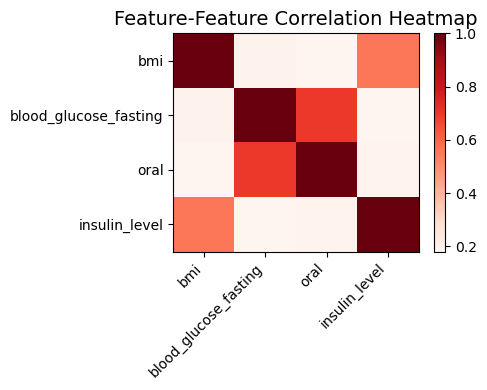

In [15]:
numerical_features = data_train.select_dtypes(include=['float64']).columns
correlation_matrix = data_train[numerical_features].corr()

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(correlation_matrix, cmap="Reds", aspect="auto")

ax.set_xticks(range(len(numerical_features)))
ax.set_yticks(range(len(numerical_features)))
ax.set_xticklabels(numerical_features, rotation=45, ha="right")
ax.set_yticklabels(numerical_features)
plt.colorbar(im, ax=ax)
plt.title("Feature-Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

Figure 3: Feature-Feature Correlation Heatmap

## Model Definition

We chose the logistic regression modeling approach because of two principal reasons:-

* In addition to a hard prediction, we would get a probability value which will be useful for additional interpretation
* Using the learned coefficients we will be able to easily interpret the model and determine feature importance

**Pre-processing**

We chose to do pre-processing on the input data as follows:-

* We did not have to do any imputation of values because the data set does not contain any missing values
* We used a `StandardScaler` for the numeric columns `bmi`, `blood_glucose_fasting`, `oral` and `insulin_level`
* The column `diabetic` is categorical, but contained ordered levels of a subject being diabetic (the spectrum being `No` to `Borderline` and finally `Yes` for diabetic subjects). We therefore used a `OrdinalEncoder` for this column
* The other categorical columns, `weekly_physical_activity` and `gender`, contain nominal values and so we applied a `OneHotEncoder`

The code packages all the column transformers into a a `ColumnTransformer` pipeline.

**Hyperparameter Optimization**

We had only one hyperparameter to optimize for our logistic regression model. To obtain the best value for the hyperparameter `C`, we used `GridSearchCV`. Our best value was $C = 0.0001$. Based on our exploratory data analysis, we knew that we had a class imbalance and chose to set `class_weight = 'balanced'`. In future iterations, we will explore manually adjusting the class weights to see if it would improve the model's performance.

**Model Fitting**

Once we obtained the best values for the hyperparameter `C`, we defined a logistic regression model pipeline with the column transformers described above, and a logistic regression object initialized with the best hyperparameter values. We then fitted this estimator on the entire training dataset.

**Model Evaluation**

With a model fitted using the best hyperparameter values, we evaluated the model against the test dataset to obtain model performance metrics.

## Model Definition

In [16]:
# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

In [17]:
#Load the training data
data_train = pd.read_csv(file_data_train)

In [18]:
# data columns
numeric_features = ['bmi', 'blood_glucose_fasting', 'oral', 'insulin_level']
categorical_features = ['weekly_physical_activity', 'gender']
ordinal_features = ['diabetic']
drop_features = []
target = 'age_group'

# separate the features
X_train, y_train = data_train.drop(columns = [target]), data_train[target]

In [19]:
# numeric columns
numeric_transformer = StandardScaler()

#ordinal column
diabetic_levels = ['No', 'Borderline', 'Yes']
ordinal_transformer = OrdinalEncoder(categories=[diabetic_levels], dtype = int)

#Binary
binary_transformer = OneHotEncoder(drop = 'if_binary', dtype = int)

#create categorical pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value = 'missing'), 
    OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
)

In [20]:
preprocessor = make_column_transformer(
    # transformer for numeric features
    (numeric_transformer, numeric_features),
    # ordinal transformer
    (ordinal_transformer, ordinal_features),
    #categorical features
    (categorical_transformer, categorical_features),
    #features to drop/not use
    ("drop", drop_features), 
)

# view the transformers
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['bmi', 'blood_glucose_fasting', 'oral',
                                  'insulin_level']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['No', 'Borderline',
                                                             'Yes']],
                                                dtype=<class 'int'>),
                                 ['diabetic']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['weekly_physical_activity', 'gender']),
                                ('drop', 'drop', [])])

In [21]:
lgr_classifier = LogisticRegression(max_iter = 2000, 
                                    random_state = 123,
                                   class_weight = 'balanced')
pipe = make_pipeline(preprocessor, lgr_classifier)

## Model Hyperparameter Estimation

We have one hyperparameter, `C`, to estimate the best setting for. We therefore decided to use `GridSearchCV`

In [22]:
# Parameter values for Logistic Regression
param_grid = {
    'logisticregression__C': 10.0 ** np.arange(-6, 6)
}

In [23]:
gs_optimize = GridSearchCV(
    pipe, param_grid, n_jobs = -1, cv = 10, return_train_score = True
)
gs_optimize.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['bmi',
                                                                          'blood_glucose_fasting',
                                                                          'oral',
                                                                          'insulin_level']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['No',
                                                                                                     'Borderline',
                                                                                                     'Yes']],
                                                                                        dtype=<class 'int'>),
                                                                         ['diabetic']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImpu...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['weekly_physical_activity',
                                                                          'gender']),
                                                                        ('drop',
                                                                         'drop',
                                                                         [])])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=2000,
                                                           random_state=123))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True)

In [24]:
gs_optimize.best_params_

{'logisticregression__C': np.float64(0.0001)}

In [25]:
gs_optimize.best_score_

np.float64(0.751014791881665)

In [26]:
train_scores = gs_optimize.cv_results_["mean_train_score"]
cv_scores = gs_optimize.cv_results_["mean_test_score"]
#plot_train_cv(param_grid["svc__C"], train_scores, cv_scores, xlabel="C")
train_cv_df = pd.concat([
    pd.DataFrame({
        'C': np.log10(param_grid["logisticregression__C"]),
        'score': train_scores,
        'score_type': ['Training'] * len(train_scores)}
                ),
    pd.DataFrame({
        'C': np.log10(param_grid["logisticregression__C"]),
        'score': cv_scores,
        'score_type': ['Cross Validation'] * len(cv_scores)}
                )
])
alt.Chart(train_cv_df).mark_line().encode(
    x = alt.X('C', title = 'Hyper Parameter C'),
    y = alt.Y('score', title = 'Model Score').scale(zero = False),
    color = alt.Color('score_type')
)

alt.Chart(...)

## Model Fitting

Use the best hyperparameter values obtained to fit a model on the entire training dataset

In [27]:
# create pipeline with final parameters and fit
lgr_classifier = LogisticRegression(max_iter = 2000, 
                                    random_state = 123,
                                   class_weight = 'balanced',
                                   C = 0.0001)
pipe = make_pipeline(preprocessor, lgr_classifier)

# fit on entire training dataset
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['bmi',
                                                   'blood_glucose_fasting',
                                                   'oral', 'insulin_level']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Borderline',
                                                                              'Yes']],
                                                                 dtype=<class 'int'>),
                                                  ['diabetic']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['weekly_physical_activity',
                                                   'gender']),
                                                 ('drop', 'drop', [])])),
                ('logisticregression',
                 LogisticRegression(C=0.0001, class_weight='balanced',
                                    max_iter=2000, random_state=123))])

## Model Evaluation

Evaluation of the fitted model against the test dataset and obtain performance metrics

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [29]:
# Load test data
data_test = pd.read_csv(file_data_test)
X_test, y_test = data_test.drop(columns = [target]), data_test[target]

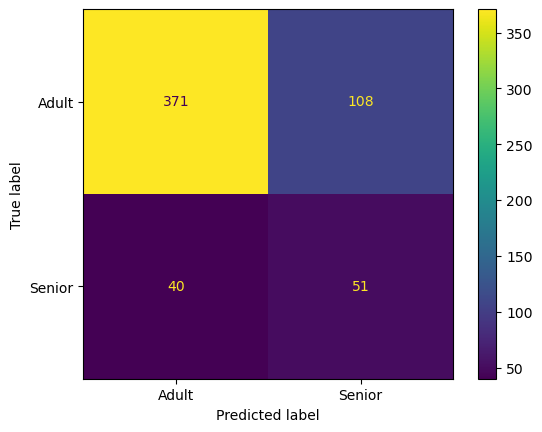

In [30]:
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    cross_val_predict(pipe, X_test, y_test),  
    values_format = 'd'  
)

In [31]:
print(
    classification_report(
        y_train, pipe.predict(X_train)
    )
)

              precision    recall  f1-score   support

       Adult       0.90      0.79      0.84      1434
      Senior       0.33      0.55      0.41       273

    accuracy                           0.75      1707
   macro avg       0.62      0.67      0.63      1707
weighted avg       0.81      0.75      0.77      1707



# Discussion and conclusion

We have been able to create a Logistic Regression classifier with a Macro Average F1 score of 0.63 and a decent accuracy of 0.7. For both classes, more than half the test cases are correctly classified.

This was our very first attempt at fitting a classification model to this data set and so the performance is in line with our expectation. The F1 score to identify the Senior class is not so great and that for Adult seems high, but we have to take note of the fact that there is a class imbalance: the data set contains many more examples of Adult than Senior. Given the limited number of features in the data set, and the class imbalance, we think that this result is satisfactory. 

There is certainly more that we will explore to try and improve this model. For starters, we read the Scikit-Learn documentation to find additional hyper parameters that we can tune to improve the performance of this Logistic Regression model. We can then add these parameters to the GridSearchCV or explore them using RandomizedSearchCV to help us explore the search space better. We haven't also examined the distribution of the probability values returned by the current model, to explore whether we can adjust the default threshold.

Early on we decided to go straight to use a Logistic Regression model. We are aware that we have additional machine learning model types that we can explore to compare with our current results. We can evaluate K-Nearest Neighbor, and SVC RBF Classifier and Naive Bayes. 

This model is a good baseline for these additional questions.

# References

Barrett, P., Hunter, J., Miller, J.T., Hsu, J.C. and Greenfield, P., 2005, December. matplotlib--A Portable Python Plotting Package. In Astronomical data analysis software and systems XIV (Vol. 347, p. 91).

Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.

Löckenhoff, C.E. et al. (2016) ‘Adult age differences in health-related decision-making: A Primer’, Handbook of Health Decision Science, pp. 145–155. doi:10.1007/978-1-4939-3486-7_11. 

McKinney, Wes. 2010. “Data Structures for Statistical Computing in Python.” In Proceedings of the 9th Python in Science Conference, edited by Stéfan van der Walt and Jarrod Millman, 51–56.

National Health and Nutrition Health Survey (NHANES), 2019. Age Prediction Subset (2013-2014) [dataset]. UCI Machine Learning Repository. Available at: https://doi.org/10.24432/C5BS66

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.

Reitz, Kenneth. 2011. Requests: HTTP for Humans. https://requests.readthedocs.io/en/master/.

VanderPlas, J. et al., 2018. Altair: Interactive statistical visualizations for python. Journal of open source software, 3(32), p.1057.

Van Rossum, Guido, and Fred L. Drake. 2009. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.

Paper, David. 2020. Hands-on Scikit-Learn for Machine Learning Applications Data Science Fundamentals with Python. Apress, p. 50-51.